[[ 225.89167753]
 [ 223.80908857]
 [ 221.74735499]
 [ 219.7062771 ]
 [ 217.68564713]
 [ 215.68525941]
 [ 213.70491038]
 [ 211.74439853]
 [ 209.80352439]
 [ 207.88209052]
 [ 205.97990147]
 [ 204.09676378]
 [ 202.23248593]
 [ 200.38687837]
 [ 198.55975344]
 [ 196.7509254 ]
 [ 194.96021036]
 [ 193.18742633]
 [ 191.43239313]
 [ 189.69493242]
 [ 187.97486765]
 [ 186.27202408]
 [ 184.58622871]
 [ 182.91731029]
 [ 181.26509933]
 [ 179.62942803]
 [ 178.01013028]
 [ 176.40704167]
 [ 174.81999943]
 [ 173.24884246]
 [ 171.69341125]
 [ 170.15354793]
 [ 168.62909623]
 [ 167.11990144]
 [ 165.6258104 ]
 [ 164.14667154]
 [ 162.68233477]
 [ 161.23265156]
 [ 159.79747484]
 [ 158.37665905]
 [ 156.97006009]
 [ 155.57753531]
 [ 154.19894351]
 [ 152.83414491]
 [ 151.48300112]
 [ 150.14537518]
 [ 148.82113149]
 [ 147.51013581]
 [ 146.21225528]
 [ 144.92735836]
 [ 143.65531483]
 [ 142.3959958 ]
 [ 141.14927368]
 [ 139.91502213]
 [ 138.69311614]
 [ 137.48483538]
 [ 136.30051162]
 [ 135.12803348]
 [ 133.9672821

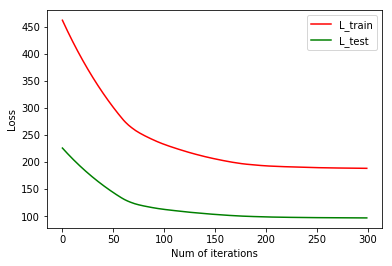

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
#从文件中导入数据
data = load_svmlight_file("australian_scale.txt")

X, y = data[0], data[1]

X=X.dot(np.eye(14)) #将X转换成numpy类型 
X=np.column_stack((X,np.ones((690,1)))) #为X的最后一列加入偏置项

#将y转化为二维的
y=y.reshape(690,1)

#将数据随机按照2：1分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#将参数初始化为全0
w=np.zeros((15,1))
G=np.zeros((15,1))
D=np.zeros((15,1))

#得到各个数据集中的数据个数 
m_train=X_train.shape[0]
m_test=X_test.shape[0]

L_train=np.zeros((300,1))
L_test=np.zeros((300,1))

#设置学习率
C=1
alpha=0.01

#将循环迭代300次，计算出每一次迭代在训练集和测试集的Loss
for i in range(300):
    M_train=1-y_train*(X_train.dot(w))
    M_train[M_train<0]=0
    for j in range(m_train):
        if M_train[j]>0:
            G=G+(y_train[j]*(X_train[j,:]).reshape(15,1))
    G=w-C*G/m_train
    D=-G
    w=w+alpha*D
    M_test=1-y_test*(X_test.dot(w))
    M_test[M_test<0]=0
    L_train[i]=sum(w*w)/2+C*sum(M_train)
    L_test[i]=sum(w*w)/2+C*sum(M_test)

print(L_test)
#绘制Loss随迭代次数变化图
x=np.arange(0,300,1)
plt.plot(x,L_train,'r',label='L_train')
plt.plot(x,L_test,'g',label='L_test')
plt.legend(loc='upper right')
plt.xlabel('Num of iterations')
plt.ylabel('Loss')
plt.show()

In [17]:
(y_train[0]*(X_train[0,:])).shape

(15,)